<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/quantumclasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasifiación con SVM



In [60]:
#importamos las librerias necesarias
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

Subimos los datos necesarios para hacer el problema, de momento solo los datos de train para después ahcer la prueba con los de test.

In [61]:
datostrain = pd.read_csv('traindata.csv', sep=',')
datostrain.head()

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,5.152212,4.649557,1.0
1,1,5.969026,0.502655,1.0
2,2,3.581416,5.654867,1.0
3,3,1.759292,1.068142,1.0
4,4,5.089380,4.586725,1.0


Observamos si hay o no valores faltantes

In [62]:
datostrain.isna().sum()

Unnamed: 0    0
FeatureA      0
FeatureB      0
Target        0
dtype: int64

Subimos los datos para hacer las pruebas.

In [63]:
datosval = pd.read_csv('validationdata.csv', sep=',')
datosval.head()

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,4.900885,1.256637,1.0
1,1,4.586725,1.570796,1.0
2,2,0.000000,3.267256,1.0
3,3,2.638938,4.209734,1.0
4,4,4.963716,4.963716,1.0


Observamos si hay o no valores faltantes

In [64]:
datosval.isna().sum()

Unnamed: 0    0
FeatureA      0
FeatureB      0
Target        0
dtype: int64

Representamos los datos del enunciado del problema, los cuales debemos clasificar.

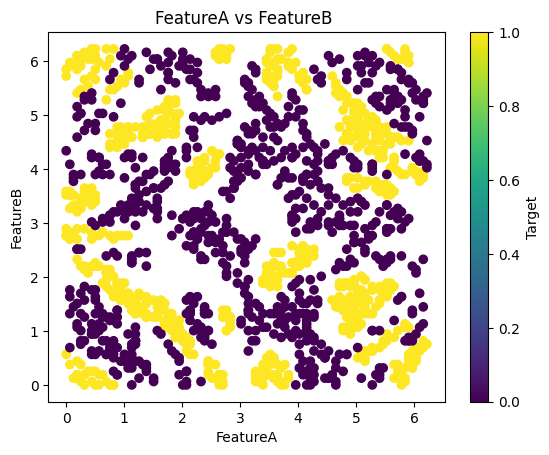

In [65]:
plt.scatter(datostrain['FeatureA'], datostrain['FeatureB'], c=datostrain['Target'], cmap='viridis')
plt.xlabel('FeatureA')
plt.ylabel('FeatureB')
plt.title('FeatureA vs FeatureB ')
plt.colorbar(label='Target')
plt.show()

Se nos ha inicado que debemos utilizar support vector machine vamos a ir creando modelos con el fin de ir acotando los parámetros.

Primero hacemos la separación para tener datos de entrenamiendo y de test. Aunque haciendo cross validation no sobre entrenariamos el modelo (lo se hacer).

In [66]:
X = datostrain[['FeatureA','FeatureB']]
y = datostrain["Target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Lo primero que vamos a acotar es el kernel, para eso probamos varios y vemos con cual nos da con más presición.

In [67]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.541667
    SVM radial   0.595833
SVM polinómico   0.537500
 SVM sigmoidal   0.489583


Observamos que el que mejor ajusta los datos es el que tiene el kernel radial, por lo que continuamos con este ajustando los demás parámetros, como los hiper parámetros C y gamma. Comenzamos por ajustar el parámetro C.

In [68]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10,100,1000,5000,10000,50000]}

# Crear un modelo SVM
svm_model = svm.SVC()

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

precisions = [['Mejor SVM', accuracy_best]]  # Agrega el mejor modelo

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))
best_kernel = best_model.kernel
best_C = best_model.C
best_gamma = best_model.gamma

print(" Mejor kernel:", best_kernel)
print(" Mejor valor de C:", best_C)
print(" Mejor valor de gamma:", best_gamma)

Modelo SVM  Precisión
 Mejor SVM     0.9125
 Mejor kernel: rbf
 Mejor valor de C: 50000
 Mejor valor de gamma: scale


Vemos que nos da mejor ajuste con mayor C, es decir, 50000, esto seguramnte sea porque al ser la calle más ancha, quedan más valores en l calle sin estar bien clasificados.
Ahora vamos a ver cual es el gamma que más se ajusta.

In [69]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'kernel': ['rbf'],
    'C': [50000],
    'gamma': [1,10,30,50]}

# Crear un modelo SVM
svm_model = svm.SVC()

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

Modelo SVM  Precisión
 Mejor SVM     0.9125


In [70]:
best_kernel = best_model.kernel
best_C = best_model.C
best_gamma = best_model.gamma

print(" Mejor kernel:", best_kernel)
print(" Mejor valor de C:", best_C)
print(" Mejor valor de gamma:", best_gamma)

 Mejor kernel: rbf
 Mejor valor de C: 50000
 Mejor valor de gamma: 30


In [71]:
# Crear un modelo SVM
svm_model = svm.SVC(kernel = 'rbf', C = 50000, gamma = 1)
svm_model.fit(X_train, y_train)


SVC(C=50000, gamma=1)

Ahora vamos a utilizar todos los datos para ver si de verdad funciona el modelo.

#Clase 26/09/2023
##Hacer nuestro propio Kernel

Primero vamos a hacerlo normal

In [72]:
X_train = np.array([0,2,4,5,7]).reshape(-1, 1)
y_train = np.array([1,1,0,1,1]).reshape(-1, 1)
X_test = np.array([1,3,6]).reshape(-1, 1)
y_test = np.array([1,0,1]).reshape(-1, 1)

In [73]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))

    Modelo SVM  Precisión
    SVM lineal   0.666667
    SVM radial   0.666667
SVM polinómico   0.666667
 SVM sigmoidal   0.666667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Y ahora vamos a adaptar nuestro modelo, viendo los datos vemos que el 0,1,2 son una categoria (1), 3 y 4 son la categoría (2) y los demás vulven a ser la categoría 1. Para adaptarlo vamos a mapear, es decir, adaptar nuestros datos.
Creando una parábola ya que nuestros puntos lo reuqieren

In [74]:
X_train = np.array([0,2,4,5,7])
y_train = np.array([1,1,0,1,1])
X_test = np.array([1,3,6])
y_test = np.array([1,0,1])

In [75]:

X_train_map = np.array([[i,(i-3.5)**2] for i in X_train])
X_test_map = np.array([[i,(i-3.5)**2] for i in X_test])


from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = SVC(kernel='linear')
lineal.fit(X_train_map, y_train)
accuracy_lineal = lineal.score(X_test_map, y_test)

accuracy_lineal

1.0

Ahora tenemos una división perfecta de los datos.

Para hacer un kernel que me clasifique bien los datos, para conseguir el kernel tenemos que hacer una matriz de productos de todos los vectores con todos, ese es nuestro kernel.

In [76]:
def kernel(x1, x2):
  k = []
  for i in x1:
    L = []
    for j in x2:
      L.append(i.dot.j)
    k.append(L)
  return k

In [77]:
y_train_map = np.array([[i,(i-3.5)**2] for i in y_train])
y_test_map = np.array([[i,(i-3.5)**2] for i in y_test])